<div align="right"><a href="https://github.com/lucasliano/Medidas1">Link Github</a></div>



<img src="logo.jpg" width="400"></img>

<div align="center">
    <h1>Resúmen Teórico de Medidas Electrónicas 1</h1>
    <h2>Señales No Senoidales (SNS)</h2>
    <h3>Liaño, Lucas</h3>
</div>



# Contenidos

- **Introducción**
- **Marco Teórico**    
- **Experimentación**
    - Caso General
    - Caso Incertidumbre tipo A dominante
    - Caso Incertidumbre tipo B dominante
    - Ejemplo Correlación
- **Bibliografía**
***
 
# Introducción  

El objetivo del presente documento es de resumir, al mismo tiempo que simular, los contenidos teóricos correspondientes a la unidad N°2 de la materia medidas electrónicas 1. Para ello, utilizaremos los recursos disponibles en el drive de la materia.

<div class="alert alert-success">
    <strong>Link:</strong> <a href="https://drive.google.com/folderview?id=1p1eVB4UoS0C-5gyienup-XiewKsTpcNc">https://drive.google.com/folderview?id=1p1eVB4UoS0C-5gyienup-XiewKsTpcNc</a>
</div>

***

# Marco Teórico

![SNS1](SNS1.png)
![SNS2](SNS2.png)
![SNS3](SNS3.png)
![SNS4](SNS4.png)

# Experimentación

Como es habitual, primero incorporamos las librerias a utilizar

In [2]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
# Módulos para Jupyter (mejores graficos!)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

## Señal senoidal
Lo primero que estudiaremos es el caso de señales senoidales, para luego poder comparar.

In [3]:
AMPLITUD = 10
OFFSET = 3
DUTY_CYCLE = 34 / 100
X_SCALE = np.linspace(0, 6*np.pi,4000,endpoint = False)
# Endpoint = False -> muestreo todo menos la ultima muestra (se usa cuando concateno funciones periodicas)
# Si empieza y termina en 0, entonces tengo duplicado el cero en la concatenacion (ultimo punto duplicado)

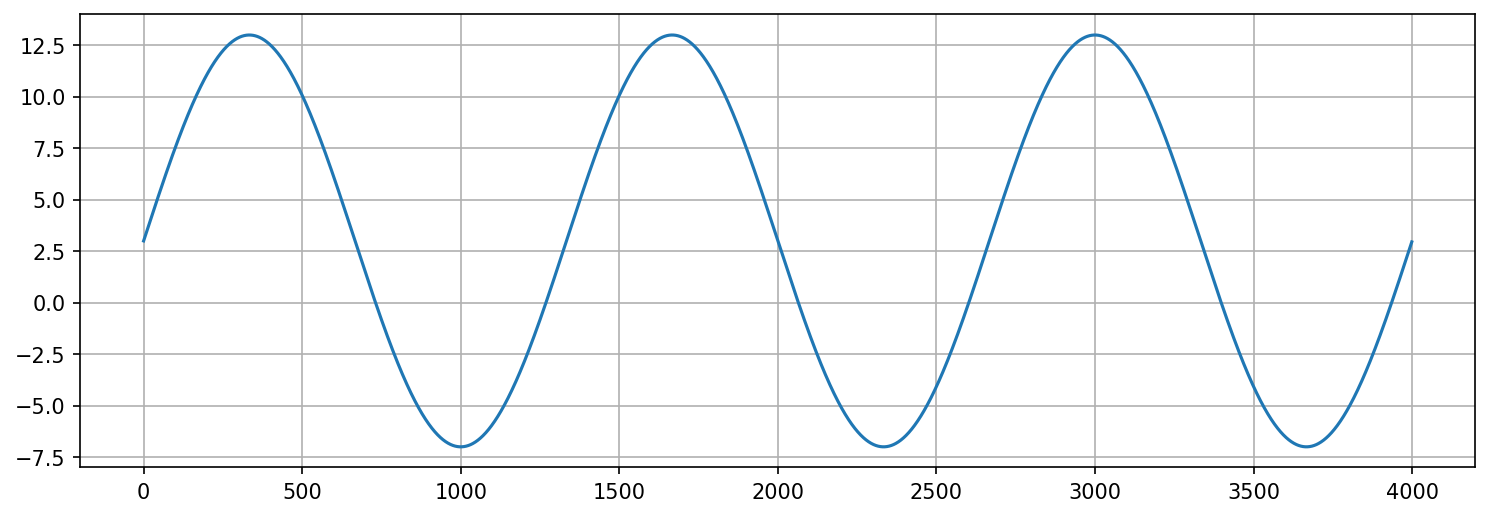

In [4]:
I = AMPLITUD * np.sin(X_SCALE) + OFFSET

plt.plot(I)
plt.grid()

### Calculo del valor RMS real

In [5]:
#signal**2 Valor cuadratico de la señal
 
def rms(signal):
    return np.sqrt((signal**2).mean())

### Calculo del valor RMS - analogia multimetro

In [6]:
#Capacitor de acople
def acCoupling(signal):
    return signal - dcValue(signal)

#Efecto rectificador de la señal
def rectifier(signal):
    return np.abs(signal)

#Calculo el valor medio de la señal (analogo al capacitor del tester)
def dcValue(signal):
    return signal.mean()

In [7]:
def rmsMultimetroMe(signal):
    kme = np.pi / (np.sqrt(2)*2) #constante de calibracion - k alpha en la tabla
    signal = acCoupling(signal)
    signal = rectifier(signal)
    signal = dcValue(signal)
    signal = signal*kme
    return signal
    
def rmsMultimetroPico(signal):
    kpe = 1 / np.sqrt(2) #constante de calibracion - k alpha en la tabla
    signal = acCoupling(signal)
    signal = rectifier(signal)
    signal = signal.max()*kpe
    return signal

In [8]:
def printSignals(signal):
    print('Amplitud = %0.2f \nOFFSET = %0.2f\n'%(AMPLITUD,OFFSET)) 
    print("RMS Multimetro (ME): ", rmsMultimetroMe(signal))
    print("RMS Multimetro (Pico): ", rmsMultimetroPico(signal))
    print("TrueRMS (Teorico): ", rms(signal))
    print("RMS (AC+DC): ", np.sqrt(rmsMultimetroMe(signal)**2 + dcValue(signal)**2))

In [9]:
printSignals(I)

Amplitud = 10.00 
OFFSET = 3.00

RMS Multimetro (ME):  7.071066357935375
RMS Multimetro (Pico):  7.071067811865475
TrueRMS (Teorico):  7.681145747868608
RMS (AC+DC):  7.681144409417483


## Señal cuadrada

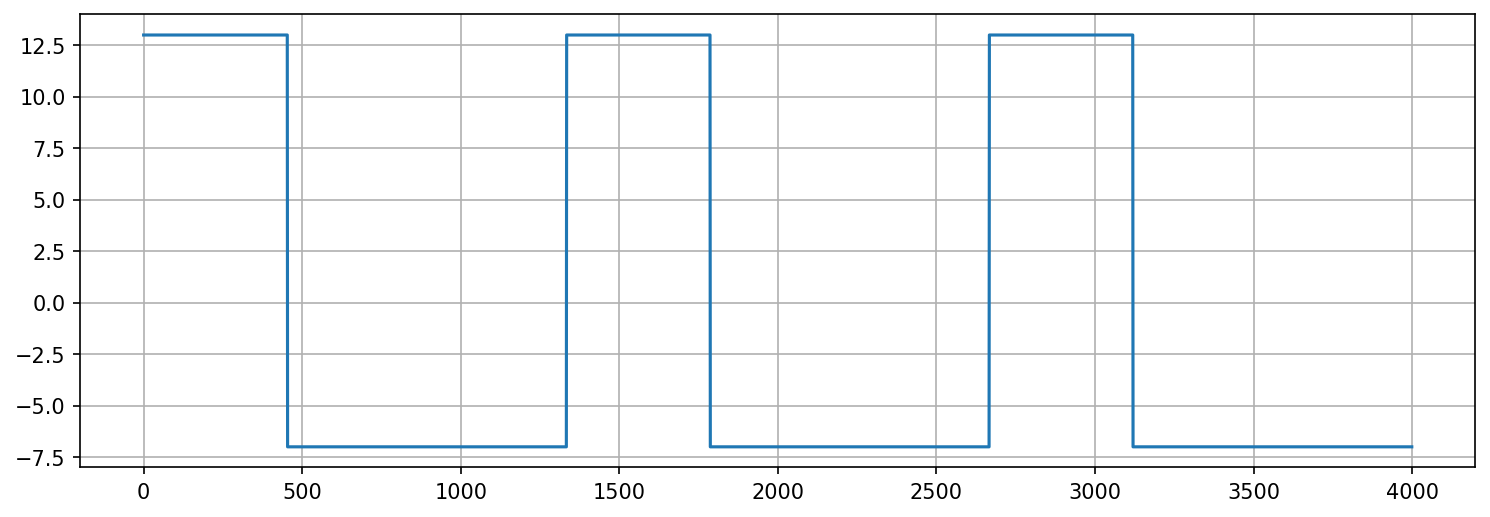

In [10]:
s = AMPLITUD * signal.square(X_SCALE, DUTY_CYCLE) + OFFSET

plt.plot(s)
plt.grid()

In [11]:
printSignals(s)

factorDeCorreccionMe_e = np.sqrt(2)/(np.pi * (np.sqrt(DUTY_CYCLE * (1 - DUTY_CYCLE))))
print('\nFactor de correccion Me : ',factorDeCorreccionMe_e)

Vbeta_AC = rmsMultimetroMe(s)*factorDeCorreccionMe_e
print('\nValor RMS AC aplicando el factor de corrección : ',Vbeta_AC)

valorRMSfinal = np.sqrt(Vbeta_AC**2 + dcValue(s)**2)
print('\nResultado AC+DC aplicando el factor de corrección : ',valorRMSfinal)




Amplitud = 10.00 
OFFSET = 3.00

RMS Multimetro (ME):  9.96982931322737
RMS Multimetro (Pico):  9.333809511662427
TrueRMS (Teorico):  9.476286192385707
RMS (AC+DC):  9.971835163844604

Factor de correccion Me :  0.9502846165372

Valor RMS AC aplicando el factor de corrección :  9.474175425861608

Resultado AC+DC aplicando el factor de corrección :  9.476286192385706


## Señal triangular

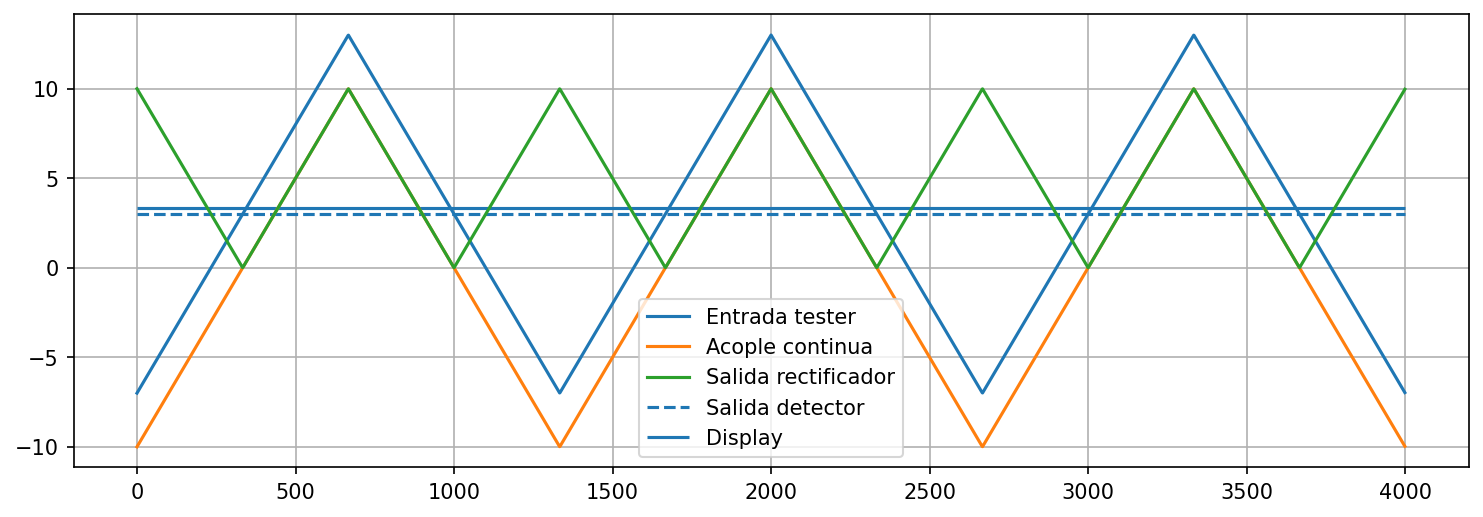

In [12]:
sTriang = AMPLITUD * signal.sawtooth(X_SCALE,0.5) + OFFSET

plt.figure(dpi = 150)
plt.plot(sTriang, label = "Entrada tester") 
plt.plot(sTriang - dcValue(sTriang), label = "Acople continua") #Señal original sin el offset
plt.plot(rectifier(sTriang - dcValue(sTriang)), label = "Salida rectificador") #señal rectificada
plt.hlines(dcValue(sTriang), 0 , sTriang.shape[0], label = "Salida detector", linestyles = 'dashed')
plt.hlines(dcValue(sTriang)*1.11, 0, sTriang.shape[0], label = "Display")
plt.legend()

plt.grid()

In [14]:
printSignals(s)

Amplitud = 10.00 
OFFSET = 3.00

RMS Multimetro (ME):  9.96982931322737
RMS Multimetro (Pico):  9.333809511662427
TrueRMS (Teorico):  9.476286192385707
RMS (AC+DC):  9.971835163844604
